# Welcome to the TGC Jupyter Notebook!
*Your source for everything TGC*

In [1]:
%matplotlib notebook
import Jupyter_Process_TGCPSM_Files as PF
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
# Generate pandas dataframe (df) from the provided csv files 
df = PF.generateDataframe()

In [3]:
# Lets take a quick look at the data 
df.head()

,dateTime,Unix,BattV,SolarV,LoadA,BattA,SolarA,loadPWR,solarPWR,hydroPWR,OutsideTemp,CabinTemp,BoxTemp
0,2020-12-30 15:36:27,1.609343e+09,12.74,0.0,-2.20,-12.20,0.0,89.93,-102.80,14.82,4.44,22.94,19.50
1,2020-12-30 15:46:27,1.609343e+09,12.75,0.0,-1.99,-11.60,0.0,89.09,-124.45,27.04,4.25,22.63,19.63
2,2020-12-30 15:46:28,1.609343e+09,12.75,0.0,-1.97,-11.73,0.0,89.09,-123.53,25.32,4.25,22.69,19.69
3,2020-12-30 15:56:27,1.609344e+09,12.99,0.0,-0.13,-6.25,0.0,88.46,-99.12,12.95,4.25,23.63,19.69
4,2020-12-30 15:56:28,1.609344e+09,12.99,0.0,-0.13,-6.25,0.0,88.46,-79.25,1.68,4.31,23.69,19.69


<IPython.core.display.Javascript object>


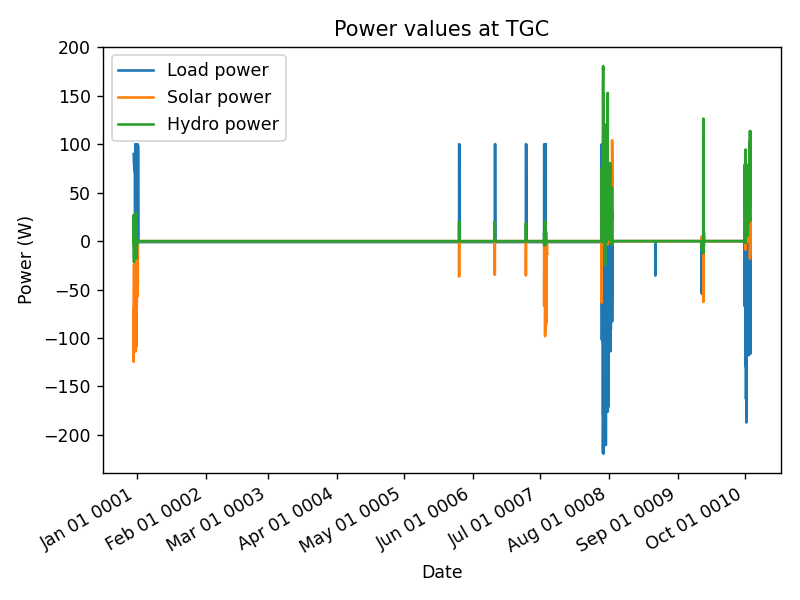

In [4]:
plt.figure()
ax = plt.gca()

df.plot(x='dateTime', y='loadPWR', ax=ax, label='Load power')
df.plot(x='dateTime', y='solarPWR', ax=ax, label='Solar power')
df.plot(x='dateTime', y='hydroPWR', ax=ax, label='Hydro power')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d %H%m'))

plt.title("Power values at TGC")
plt.xlabel("Date")
plt.ylabel("Power (W)")

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


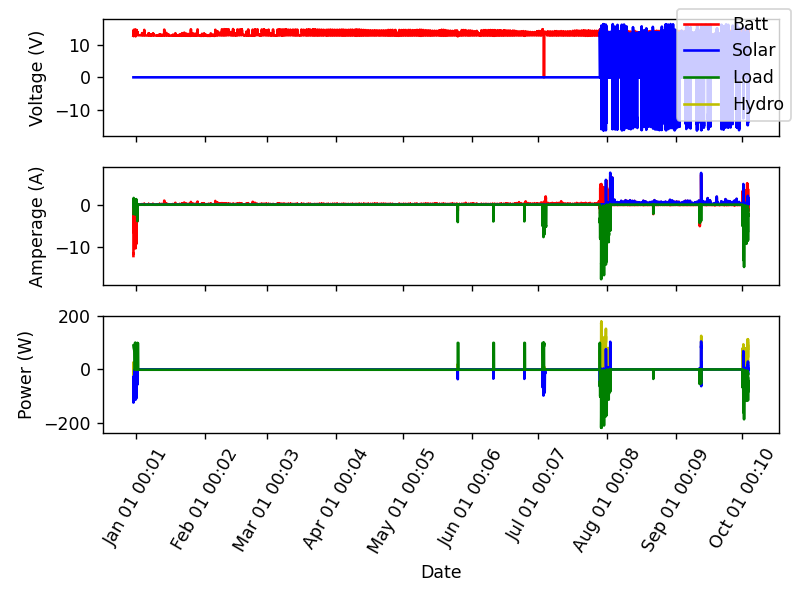

In [5]:
#plt.figure()
fig, axs = plt.subplots(3,1, sharex=True)
#plt.title("Voltages and Currents at the TGC")
axs[0].plot(df.dateTime, df.BattV, 'r', label='Batt' )
axs[0].plot(df.dateTime, df.SolarV, 'b', label='Solar')
axs[1].plot(df.dateTime, df.BattA, 'r') #, label='Batt')
axs[1].plot(df.dateTime, df.SolarA, 'b') #, label='Solar')
axs[1].plot(df.dateTime, df.LoadA, 'g', label='Load')
axs[2].plot(df.dateTime, df.hydroPWR, 'y', label='Hydro')
axs[2].plot(df.dateTime, df.solarPWR, 'b') #, label='Solar')
axs[2].plot(df.dateTime, df.loadPWR, 'g') #, label='Load')
plt.xlabel("Date")
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%b %d %H:%m'))
#axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
axs[0].set_ylabel("Voltage (V)")
axs[1].set_ylabel("Amperage (A)")
axs[2].set_ylabel("Power (W)")
plt.xticks(rotation=60)
fig.legend()
fig.tight_layout()
plt.show()

In [6]:
# Remove some temperature sensor errors
df = df.drop(df[(df.BoxTemp < -50) | (df.BoxTemp > 70)].index)
df = df.drop(df[(df.CabinTemp < -50) | (df.CabinTemp > 70)].index)
df = df.drop(df[(df.OutsideTemp < -50) | (df.OutsideTemp > 70)].index)

<IPython.core.display.Javascript object>


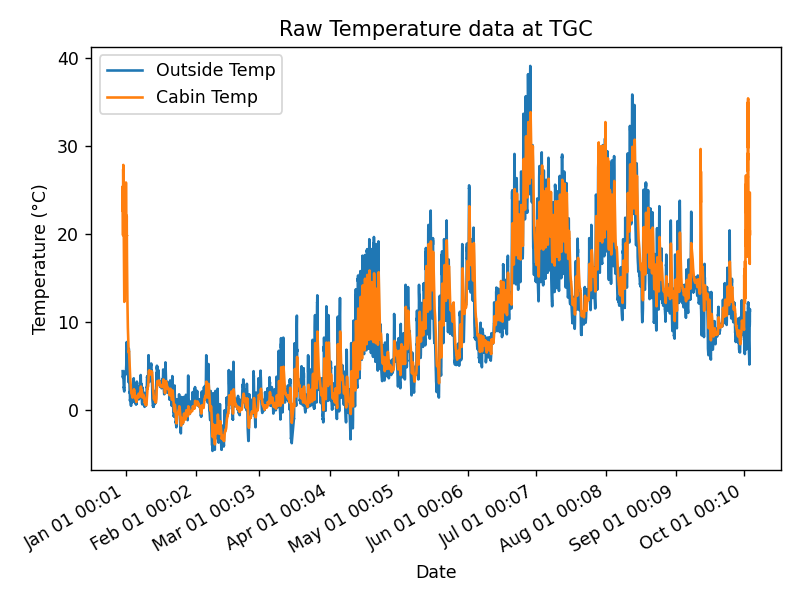

In [7]:
plt.figure()
ax = plt.gca()

df.plot(x='dateTime', y='OutsideTemp', ax=ax, label='Outside Temp')
df.plot(x='dateTime', y='CabinTemp', ax=ax, label='Cabin Temp')
#df.plot(x='dateTime', y='BoxTemp', ax=ax, label='Box Temp')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d %H:%m'))
plt.title("Raw Temperature data at TGC")
plt.xlabel("Date")
plt.ylabel("Temperature (\N{DEGREE SIGN}C)")

plt.tight_layout()
plt.show()

In [8]:
# Create a new column with temperature difference data
df['TempDiff'] = df['OutsideTemp']-df['CabinTemp']

In [9]:
# Resample data to daily resolution

df_max  = df.resample('D', on='dateTime', origin='start_day', offset='5h').max()
df_min  = df.resample('D', on='dateTime', origin='start_day', offset='5h').min()
df_mean = df.resample('D', on='dateTime', origin='start_day', offset='5h').mean()
df_mean.reset_index(level=0, inplace=True)

## Plot Daily mean temperatures

<IPython.core.display.Javascript object>


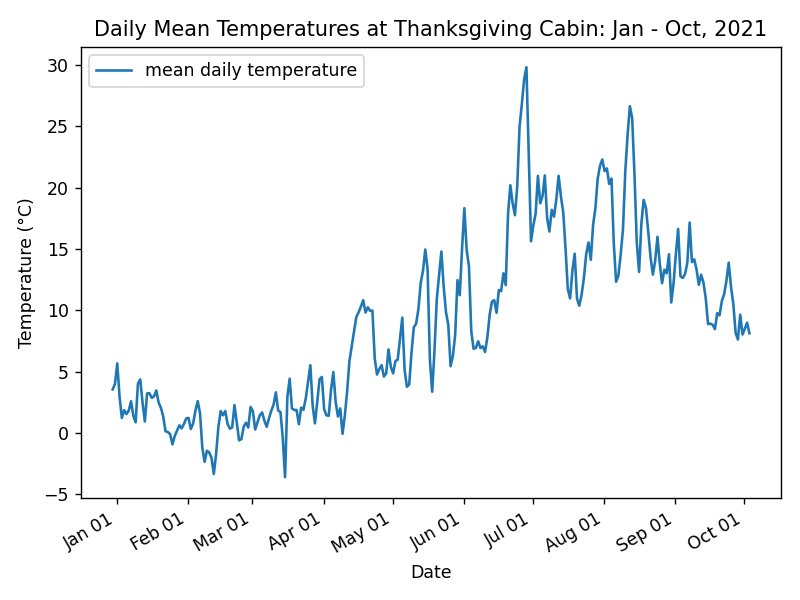

In [10]:
plt.figure()
ax = plt.gca()


df_mean.plot(kind='line', x='dateTime', y='OutsideTemp', ax=ax, label='mean daily temperature')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plt.title("Daily Mean Temperatures at Thanksgiving Cabin: Jan - Oct, 2021")
plt.xlabel("Date")
plt.ylabel("Temperature (\N{DEGREE SIGN}C)")

plt.tight_layout()
plt.show()


# Daily Min Max Temperatures

<IPython.core.display.Javascript object>


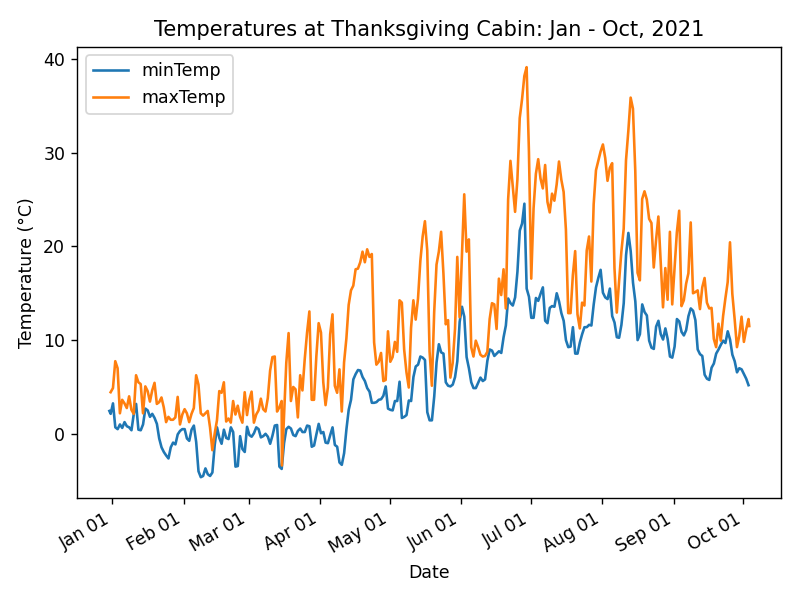

In [11]:
plt.figure()
ax = plt.gca()
df_min.plot(kind='line', x='dateTime', y='OutsideTemp', ax=ax, label='minTemp')

df_max.plot(kind='line', x='dateTime', y='OutsideTemp', ax=ax, label='maxTemp')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.title("Temperatures at Thanksgiving Cabin: Jan - Oct, 2021")
plt.xlabel("Date")
plt.ylabel("Temperature (\N{DEGREE SIGN}C)")

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


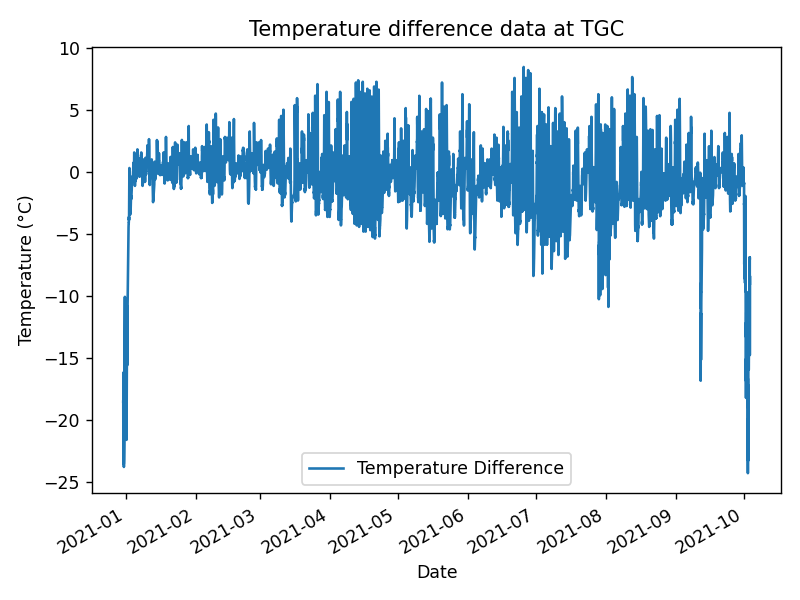

In [12]:
plt.figure()
ax = plt.gca()

df.plot(x='dateTime', y='TempDiff', ax=ax, label='Temperature Difference')

plt.title("Temperature difference data at TGC")
plt.xlabel("Date")
plt.ylabel("Temperature (\N{DEGREE SIGN}C)")

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


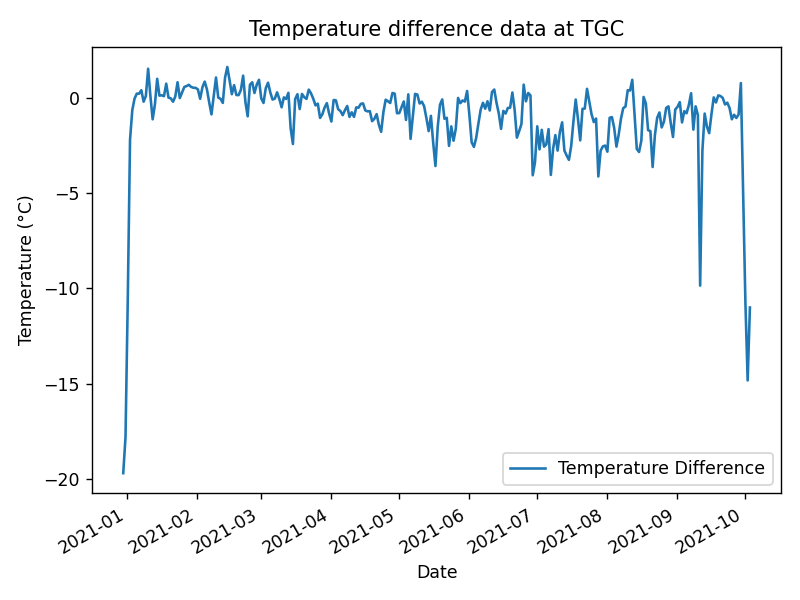

In [13]:
plt.figure()
ax = plt.gca()

df_mean.plot(x='dateTime', y='TempDiff', ax=ax, label='Temperature Difference')

plt.title("Temperature difference data at TGC")
plt.xlabel("Date")
plt.ylabel("Temperature (\N{DEGREE SIGN}C)")

plt.tight_layout()
plt.show()

In [14]:
out_df   = df[['dateTime', 'OutsideTemp']].copy()
cabin_df = df[['dateTime', 'CabinTemp']].copy()
#cabin_df.head()

In [15]:
out_df['dateTime']=pd.to_datetime(out_df['dateTime'])
cabin_df['dateTime']=pd.to_datetime(cabin_df['dateTime'])- pd.Timedelta(2, unit='h')
#cabin_df.head()

In [16]:
merged_df = pd.merge_asof(cabin_df, out_df, on='dateTime')
merged_df['TempDiff'] = merged_df['OutsideTemp'] - merged_df['CabinTemp']
#merged_df.head()

In [52]:
merged_df_mean = merged_df.resample('D', on='dateTime', origin='start_day', offset='5h').mean()
merged_df_mean.reset_index(level=0, inplace=True)

merged_df['rollSTD'] = merged_df['TempDiff'].rolling(100).mean()
merged_df['upSTD'] = merged_df['TempDiff'] + merged_df['rollSTD']*3
merged_df['downSTD'] = merged_df['TempDiff'] - merged_df['rollSTD']*3

<IPython.core.display.Javascript object>


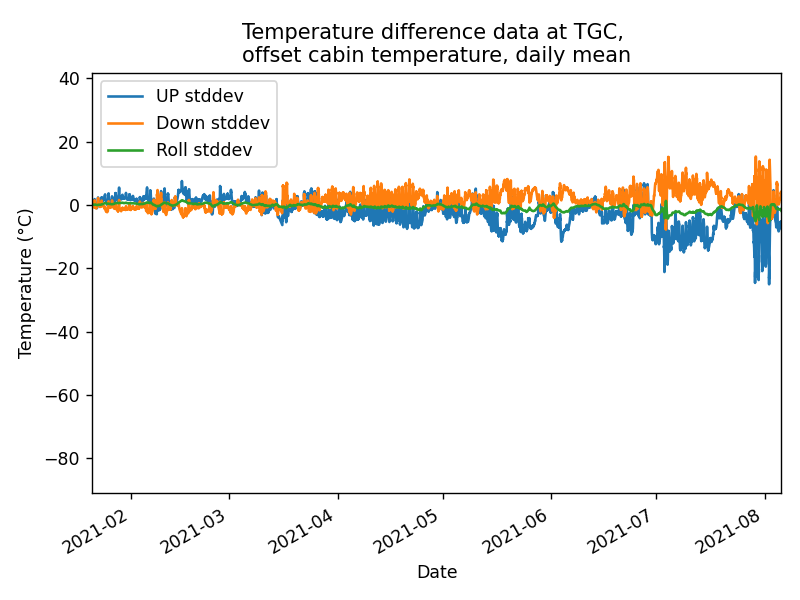

In [53]:
plt.figure()
ax = plt.gca()

merged_df.plot(x='dateTime', y='upSTD', ax=ax, label='UP stddev')
merged_df.plot(x='dateTime', y='downSTD', ax=ax, label='Down stddev')
merged_df.plot(x='dateTime', y='rollSTD', ax=ax, label='Roll stddev')

plt.title("Temperature difference data at TGC, \noffset cabin temperature, daily mean")
plt.xlabel("Date")
plt.ylabel("Temperature (\N{DEGREE SIGN}C)")

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


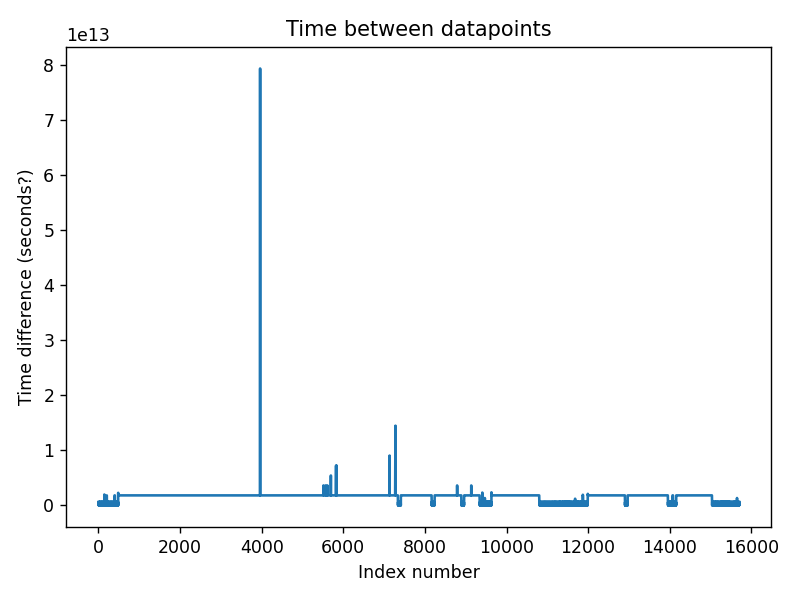

In [20]:
plt.figure()
ax = plt.gca()

df['dateTime'].diff().plot(ax=ax, label='Temperature Difference')

plt.title("Time between datapoints")
plt.xlabel("Index number")
plt.ylabel("Time difference (seconds?)")

plt.tight_layout()
plt.show()